In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle, FancyArrowPatch

# Parameters for visualization
NumDots = 4
NumConvMax = 8
NumFcMax = 20
White = 1.0
Light = 0.7
Medium= 0.5
Dark = 0.3
Darker = 0.15
Black = 0.0

In [2]:
def add_dense_block(patches, colors, num_layers, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num_layers):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)

def add_transition_layer(patches, colors, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    patches.append(Rectangle(loc_start, size[1], size[0]))
    colors.append(Dark)

def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family='sans-serif', size=10)


C:\Users\adero\AppData\Local\Temp\ipykernel_16960\272314063.py:70: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


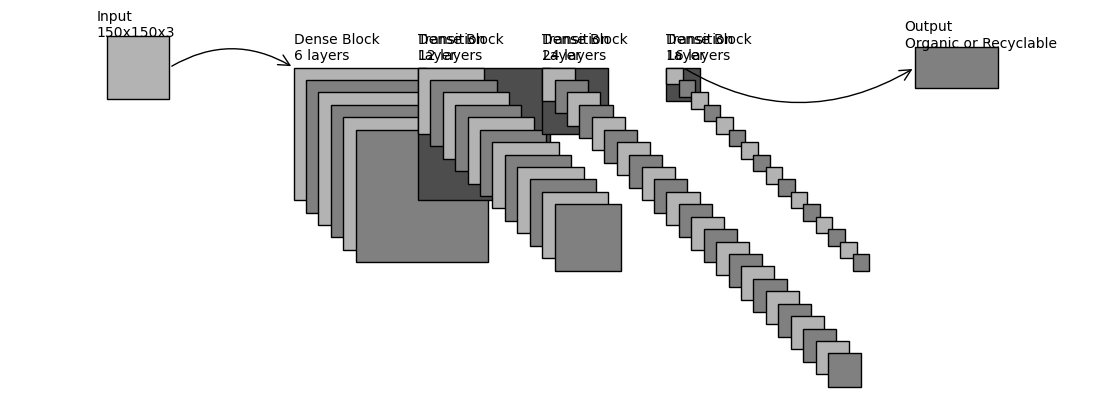

In [5]:
if __name__ == '__main__':

    # Visualization settings
    layer_width = 60
    fc_unit_size = 4
    flag_omit = True

    patches = []
    colors = []
    arrows = []

    fig, ax = plt.subplots()

    ############################
    # Dense blocks and transition layers
    size_list = [(64, 64), (32, 32), (16, 16), (8, 8)]
    num_layers_list = [6, 12, 24, 16]  # Number of layers in each dense block
    x_diff_list = [layer_width, layer_width, layer_width, layer_width]
    loc_diff_list = [[6, -6]] * len(size_list)
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        # Add dense block
        add_dense_block(patches, colors, num_layers=num_layers_list[ind], size=size_list[ind],
                        top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], 'Dense Block\n{} layers'.format(num_layers_list[ind]))

        # Add transition layer, except after the last dense block
        if ind < len(size_list) - 1:
            next_top_left = top_left_list[ind] + np.array([layer_width, 0])
            add_transition_layer(patches, colors, size=size_list[ind], top_left=next_top_left)
            label(next_top_left, 'Transition\nLayer')
            top_left_list[ind+1] = next_top_left

    ############################
    # Input layer aligned to the middle
    input_size = (150, 150)  # Example input size for DenseNet121
    input_top_left = [top_left_list[0, 0] - layer_width * 1.5, -input_size[0] / 10]
    patches.append(Rectangle(input_top_left, input_size[1] / 5, input_size[0] / 5))
    colors.append(Light)
    label(input_top_left, 'Input\n150x150x3', xy_off=[-5, 30])

    # Arrow from input to the first dense block
    arrows.append(FancyArrowPatch(posA=(input_top_left[0] + input_size[1] / 5, input_top_left[1] + input_size[0] / 10),
                                  posB=(top_left_list[0, 0], 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Output layer aligned to the middle
    output_top_left = top_left_list[-1] + np.array([layer_width * 2, -fc_unit_size * 2.5])
    patches.append(Rectangle(output_top_left, fc_unit_size * 10, fc_unit_size * 5))
    colors.append(Medium)
    label(output_top_left, 'Output\nOrganic or Recyclable', xy_off=[-5, 20])

    # Arrow from last dense block to output
    arrows.append(FancyArrowPatch(posA=(top_left_list[-1, 0] + size_list[-1][1], 0),
                                  posB=(output_top_left[0], output_top_left[1] + fc_unit_size * 2.5), connectionstyle="arc3,rad=0.3", arrowstyle="->", mutation_scale=20))

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color * np.ones(3))
        if isinstance(patch, Line2D):
            ax.add_line(patch)
        else:
            patch.set_edgecolor(Black * np.ones(3))
            ax.add_patch(patch)

    for arrow in arrows:
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(14, 5)

    # Save the figure
    output_path = 'densenet121_classification_with_arrows.png'
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

    plt.show()

C:\Users\adero\AppData\Local\Temp\ipykernel_16960\129851424.py:101: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


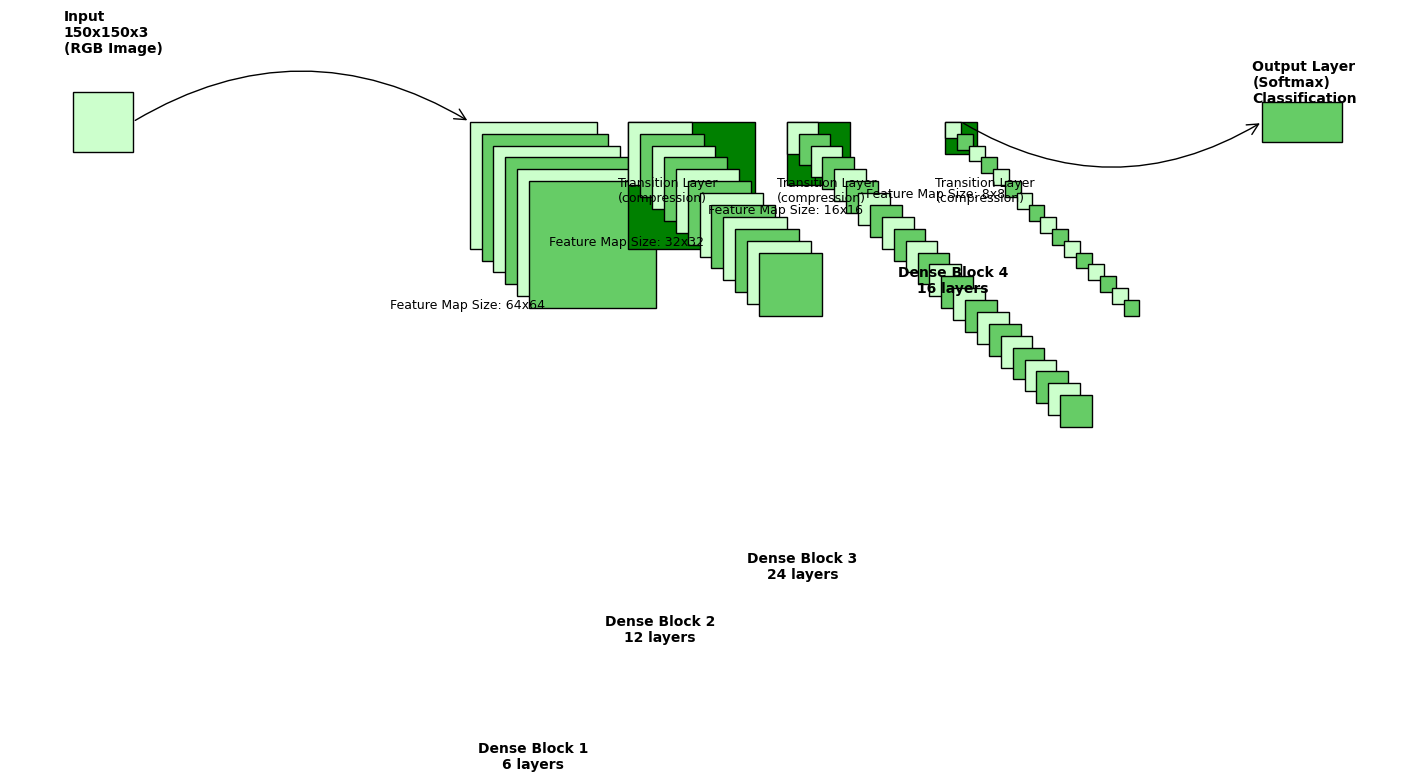

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# Define green colors
LightGreen = (0.8, 1.0, 0.8)  # Light green
MediumGreen = (0.4, 0.8, 0.4)  # Medium green
DarkGreen = (0.0, 0.5, 0.0)  # Dark green
Black = (0, 0, 0)  # Black

def add_dense_block(patches, colors, num_layers, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3], block_label=''):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num_layers):
        patch = Rectangle(loc_start + ind * loc_diff, size[1], size[0])
        patches.append(patch)
        colors.append(LightGreen if ind % 2 == 0 else MediumGreen)
    
    # Label the block with the number of layers
    block_label_pos = loc_start + np.array([size[1] // 2, -size[0] * (num_layers // 2 + 1)])
    plt.text(block_label_pos[0], block_label_pos[1], block_label, ha='center', va='center', size=10, weight='bold')

def add_transition_layer(patches, colors, size=(24, 24), top_left=[0, 0]):
    top_left = np.array(top_left)
    loc_start = top_left - np.array([0, size[0]])
    patches.append(Rectangle(loc_start, size[1], size[0]))
    colors.append(DarkGreen)

def label(xy, text, xy_off=[0, 4], font_size=10, weight='normal'):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family='sans-serif', size=font_size, weight=weight)

if __name__ == '__main__':

    # Visualization settings
    layer_width = 80  # Increased width for clarity
    fc_unit_size = 4

    patches = []
    colors = []
    arrows = []

    fig, ax = plt.subplots()

    ############################
    # Dense blocks and transition layers
    size_list = [(64, 64), (32, 32), (16, 16), (8, 8)]
    num_layers_list = [6, 12, 24, 16]  # Number of layers in each dense block
    x_diff_list = [layer_width, layer_width, layer_width, layer_width]
    loc_diff_list = [[6, -6]] * len(size_list)
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        # Add dense block
        block_label = f'Dense Block {ind+1}\n{num_layers_list[ind]} layers'
        add_dense_block(patches, colors, num_layers=num_layers_list[ind], size=size_list[ind],
                        top_left=top_left_list[ind], loc_diff=loc_diff_list[ind], block_label=block_label)
        
        # Detailed block information
        label(top_left_list[ind], f'Feature Map Size: {size_list[ind][0]}x{size_list[ind][1]}', xy_off=[-40, -size_list[ind][0] - 30], font_size=9)
        
        # Add transition layer, except after the last dense block
        if ind < len(size_list) - 1:
            next_top_left = top_left_list[ind] + np.array([layer_width, 0])
            add_transition_layer(patches, colors, size=size_list[ind], top_left=next_top_left)
            label(next_top_left, 'Transition Layer\n(compression)', xy_off=[-5, -40], font_size=9)
            top_left_list[ind + 1] = next_top_left

    ############################
    # Input layer aligned to the middle
    input_size = (150, 150)  # Example input size for DenseNet121
    input_top_left = [top_left_list[0, 0] - layer_width * 2.5, -input_size[0] / 10]
    patches.append(Rectangle(input_top_left, input_size[1] / 5, input_size[0] / 5))
    colors.append(LightGreen)
    label(input_top_left, 'Input\n150x150x3\n(RGB Image)', xy_off=[-5, 50], font_size=10, weight='bold')

    # Arrow from input to the first dense block
    arrows.append(FancyArrowPatch(posA=(input_top_left[0] + input_size[1] / 5, input_top_left[1] + input_size[0] / 10),
                                  posB=(top_left_list[0, 0], 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Output layer aligned to the middle
    output_top_left = top_left_list[-1] + np.array([layer_width * 2, -fc_unit_size * 2.5])
    patches.append(Rectangle(output_top_left, fc_unit_size * 10, fc_unit_size * 5))
    colors.append(MediumGreen)
    label(output_top_left, 'Output Layer\n(Softmax)\nClassification', xy_off=[-5, 20], font_size=10, weight='bold')

    # Arrow from last dense block to output
    arrows.append(FancyArrowPatch(posA=(top_left_list[-1, 0] + size_list[-1][1], 0),
                                  posB=(output_top_left[0], output_top_left[1] + fc_unit_size * 2.5), connectionstyle="arc3,rad=0.3", arrowstyle="->", mutation_scale=20))

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color)
        patch.set_edgecolor(Black)
        ax.add_patch(patch)

    for arrow in arrows:
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(18, 6)  # Increase figure size for better clarity

    # Save the figure
    output_path = 'densenet121_classification_detailed.png'
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

    plt.show()


C:\Users\adero\AppData\Local\Temp\ipykernel_16960\135295819.py:101: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


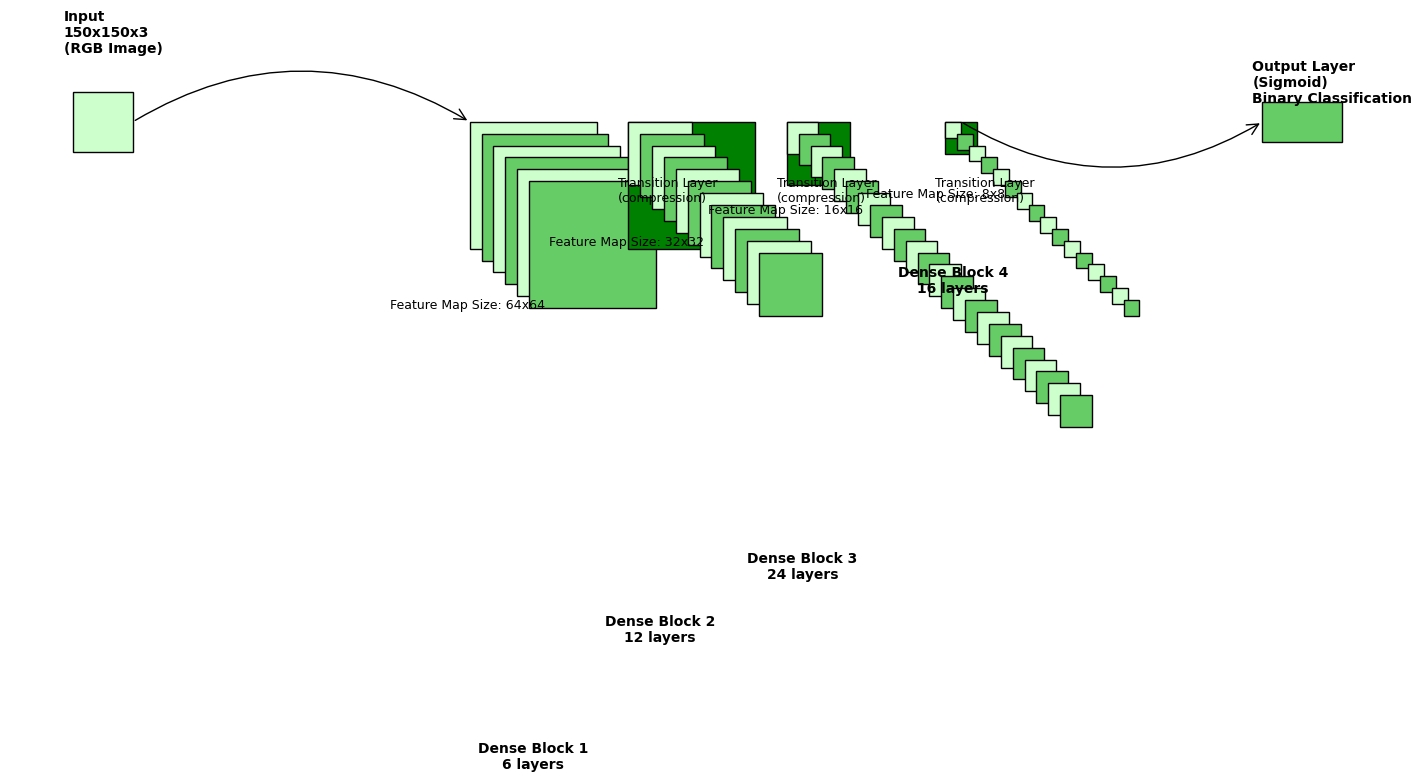

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# Define green colors
LightGreen = (0.8, 1.0, 0.8)  # Light green
MediumGreen = (0.4, 0.8, 0.4)  # Medium green
DarkGreen = (0.0, 0.5, 0.0)  # Dark green
Black = (0, 0, 0)  # Black

def add_dense_block(patches, colors, num_layers, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3], block_label=''):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num_layers):
        patch = Rectangle(loc_start + ind * loc_diff, size[1], size[0])
        patches.append(patch)
        colors.append(LightGreen if ind % 2 == 0 else MediumGreen)
    
    # Label the block with the number of layers
    block_label_pos = loc_start + np.array([size[1] // 2, -size[0] * (num_layers // 2 + 1)])
    plt.text(block_label_pos[0], block_label_pos[1], block_label, ha='center', va='center', size=10, weight='bold')

def add_transition_layer(patches, colors, size=(24, 24), top_left=[0, 0]):
    top_left = np.array(top_left)
    loc_start = top_left - np.array([0, size[0]])
    patches.append(Rectangle(loc_start, size[1], size[0]))
    colors.append(DarkGreen)

def label(xy, text, xy_off=[0, 4], font_size=10, weight='normal'):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family='sans-serif', size=font_size, weight=weight)

if __name__ == '__main__':

    # Visualization settings
    layer_width = 80  # Increased width for clarity
    fc_unit_size = 4

    patches = []
    colors = []
    arrows = []

    fig, ax = plt.subplots()

    ############################
    # Dense blocks and transition layers
    size_list = [(64, 64), (32, 32), (16, 16), (8, 8)]
    num_layers_list = [6, 12, 24, 16]  # Number of layers in each dense block
    x_diff_list = [layer_width, layer_width, layer_width, layer_width]
    loc_diff_list = [[6, -6]] * len(size_list)
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        # Add dense block
        block_label = f'Dense Block {ind+1}\n{num_layers_list[ind]} layers'
        add_dense_block(patches, colors, num_layers=num_layers_list[ind], size=size_list[ind],
                        top_left=top_left_list[ind], loc_diff=loc_diff_list[ind], block_label=block_label)
        
        # Detailed block information
        label(top_left_list[ind], f'Feature Map Size: {size_list[ind][0]}x{size_list[ind][1]}', xy_off=[-40, -size_list[ind][0] - 30], font_size=9)
        
        # Add transition layer, except after the last dense block
        if ind < len(size_list) - 1:
            next_top_left = top_left_list[ind] + np.array([layer_width, 0])
            add_transition_layer(patches, colors, size=size_list[ind], top_left=next_top_left)
            label(next_top_left, 'Transition Layer\n(compression)', xy_off=[-5, -40], font_size=9)
            top_left_list[ind + 1] = next_top_left

    ############################
    # Input layer aligned to the middle
    input_size = (150, 150)  # Example input size for DenseNet121
    input_top_left = [top_left_list[0, 0] - layer_width * 2.5, -input_size[0] / 10]
    patches.append(Rectangle(input_top_left, input_size[1] / 5, input_size[0] / 5))
    colors.append(LightGreen)
    label(input_top_left, 'Input\n150x150x3\n(RGB Image)', xy_off=[-5, 50], font_size=10, weight='bold')

    # Arrow from input to the first dense block
    arrows.append(FancyArrowPatch(posA=(input_top_left[0] + input_size[1] / 5, input_top_left[1] + input_size[0] / 10),
                                  posB=(top_left_list[0, 0], 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Output layer aligned to the middle
    output_top_left = top_left_list[-1] + np.array([layer_width * 2, -fc_unit_size * 2.5])
    patches.append(Rectangle(output_top_left, fc_unit_size * 10, fc_unit_size * 5))
    colors.append(MediumGreen)
    label(output_top_left, 'Output Layer\n(Sigmoid)\nBinary Classification', xy_off=[-5, 20], font_size=10, weight='bold')

    # Arrow from last dense block to output
    arrows.append(FancyArrowPatch(posA=(top_left_list[-1, 0] + size_list[-1][1], 0),
                                  posB=(output_top_left[0], output_top_left[1] + fc_unit_size * 2.5), connectionstyle="arc3,rad=0.3", arrowstyle="->", mutation_scale=20))

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color)
        patch.set_edgecolor(Black)
        ax.add_patch(patch)

    for arrow in arrows:
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(18, 6)  # Increase figure size for better clarity

    # Save the figure
    output_path = 'densenet121_classification_detailed_sigmoid.png'
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

    plt.show()





C:\Users\adero\AppData\Local\Temp\ipykernel_16960\667899509.py:97: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


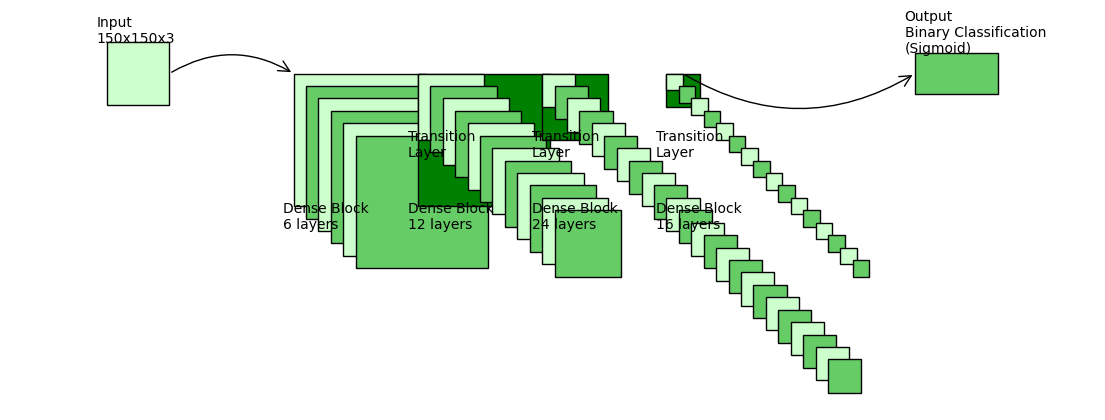

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# Define green colors
LightGreen = (0.8, 1.0, 0.8)  # Light green
MediumGreen = (0.4, 0.8, 0.4)  # Medium green
DarkGreen = (0.0, 0.5, 0.0)  # Dark green
Black = (0, 0, 0)  # Black

def add_dense_block(patches, colors, num_layers, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num_layers):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(MediumGreen)
        else:
            colors.append(LightGreen)

def add_transition_layer(patches, colors, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    patches.append(Rectangle(loc_start, size[1], size[0]))
    colors.append(DarkGreen)

def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family='sans-serif', size=10)

if __name__ == '__main__':

    # Visualization settings
    layer_width = 60
    fc_unit_size = 4

    patches = []
    colors = []
    arrows = []

    fig, ax = plt.subplots()

    ############################
    # Dense blocks and transition layers
    size_list = [(64, 64), (32, 32), (16, 16), (8, 8)]
    num_layers_list = [6, 12, 24, 16]  # Number of layers in each dense block
    x_diff_list = [layer_width, layer_width, layer_width, layer_width]
    loc_diff_list = [[6, -6]] * len(size_list)
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        # Add dense block
        add_dense_block(patches, colors, num_layers=num_layers_list[ind], size=size_list[ind],
                        top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], 'Dense Block\n{} layers'.format(num_layers_list[ind]), xy_off=[-5, -75])

        # Add transition layer, except after the last dense block
        if ind < len(size_list) - 1:
            next_top_left = top_left_list[ind] + np.array([layer_width, 0])
            add_transition_layer(patches, colors, size=size_list[ind], top_left=next_top_left)
            label(next_top_left, 'Transition\nLayer', xy_off=[-5, -40])
            top_left_list[ind + 1] = next_top_left

    ############################
    # Input layer aligned to the middle
    input_size = (150, 150)  # Example input size for DenseNet121
    input_top_left = [top_left_list[0, 0] - layer_width * 1.5, -input_size[0] / 10]
    patches.append(Rectangle(input_top_left, input_size[1] / 5, input_size[0] / 5))
    colors.append(LightGreen)
    label(input_top_left, 'Input\n150x150x3', xy_off=[-5, 30])

    # Arrow from input to the first dense block
    arrows.append(FancyArrowPatch(posA=(input_top_left[0] + input_size[1] / 5, input_top_left[1] + input_size[0] / 10),
                                  posB=(top_left_list[0, 0], 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Output layer aligned to the middle
    output_top_left = top_left_list[-1] + np.array([layer_width * 2, -fc_unit_size * 2.5])
    patches.append(Rectangle(output_top_left, fc_unit_size * 10, fc_unit_size * 5))
    colors.append(MediumGreen)
    label(output_top_left, 'Output\nBinary Classification\n(Sigmoid)', xy_off=[-5, 20])

    # Arrow from last dense block to output
    arrows.append(FancyArrowPatch(posA=(top_left_list[-1, 0] + size_list[-1][1], 0),
                                  posB=(output_top_left[0], output_top_left[1] + fc_unit_size * 2.5), connectionstyle="arc3,rad=0.3", arrowstyle="->", mutation_scale=20))

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color)
        patch.set_edgecolor(Black)
        ax.add_patch(patch)

    for arrow in arrows:
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(14, 5)

    # Save the figure
    output_path = 'densenet121_classification_with_arrows_green.png'
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

    plt.show()


C:\Users\adero\AppData\Local\Temp\ipykernel_16960\426087408.py:110: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


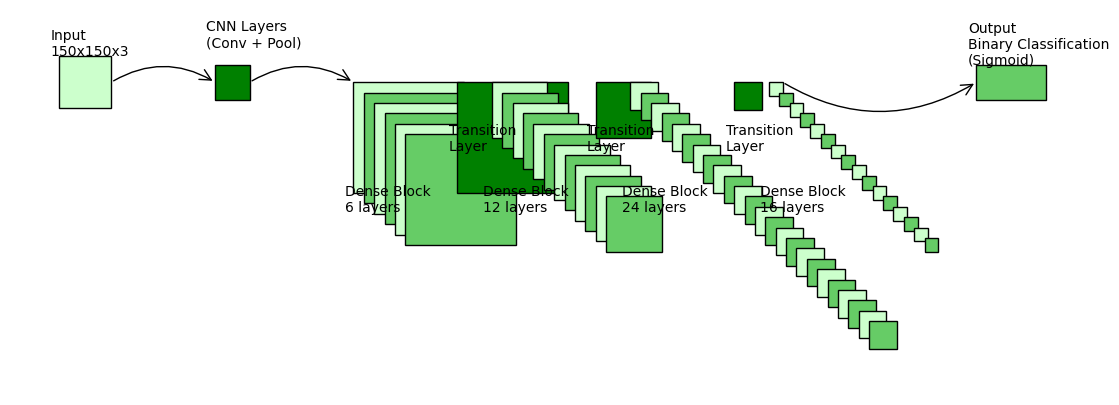

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

NumDots = 4
NumConvMax = 8
NumFcMax = 20
LightOrange = (1.0, 0.8, 0.6)
MediumOrange = (1.0, 0.6, 0.2)
DarkOrange = (0.9, 0.4, 0.1)
Black = (0.0, 0.0, 0.0)

def add_dense_block(patches, colors, num_layers, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num_layers):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0]))
        if ind % 2:
            colors.append(MediumGreen)
        else:
            colors.append(LightGreen)

def add_transition_layer(patches, colors, size=(24, 24), top_left=[0, 0], loc_diff=[3, -3]):
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    patches.append(Rectangle(loc_start, size[1], size[0]))
    colors.append(DarkGreen)

def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text, family='sans-serif', size=10)

if __name__ == '__main__':

    # Visualization settings
    layer_width = 60
    fc_unit_size = 4

    patches = []
    colors = []
    arrows = []

    fig, ax = plt.subplots()

    ############################
    # CNN base layer
    cnn_size = (100, 100)  # Example size of the CNN layers
    cnn_top_left = [0, -cnn_size[0] / 10]
    patches.append(Rectangle(cnn_top_left, cnn_size[1] / 5, cnn_size[0] / 5))
    colors.append(DarkGreen)
    label(cnn_top_left, 'CNN Layers\n(Conv + Pool)', xy_off=[-5, 30])

    # Input layer aligned to the middle
    input_size = (150, 150)  # Example input size for DenseNet121
    input_top_left = [cnn_top_left[0] - layer_width * 1.5, -input_size[0] / 10]
    patches.append(Rectangle(input_top_left, input_size[1] / 5, input_size[0] / 5))
    colors.append(LightGreen)
    label(input_top_left, 'Input\n150x150x3', xy_off=[-5, 30])

    # Arrow from input to CNN layers
    arrows.append(FancyArrowPatch(posA=(input_top_left[0] + input_size[1] / 5, input_top_left[1] + input_size[0] / 10),
                                  posB=(cnn_top_left[0], 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Dense blocks and transition layers
    size_list = [(64, 64), (32, 32), (16, 16), (8, 8)]
    num_layers_list = [6, 12, 24, 16]  # Number of layers in each dense block
    x_diff_list = [layer_width, layer_width, layer_width, layer_width]
    loc_diff_list = [[6, -6]] * len(size_list)
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        # Add dense block
        add_dense_block(patches, colors, num_layers=num_layers_list[ind], size=size_list[ind],
                        top_left=top_left_list[ind] + np.array([cnn_size[1] / 5, 0]), loc_diff=loc_diff_list[ind])
        label(top_left_list[ind] + np.array([cnn_size[1] / 5, 0]), 'Dense Block\n{} layers'.format(num_layers_list[ind]), xy_off=[-5, -75])

        # Add transition layer, except after the last dense block
        if ind < len(size_list) - 1:
            next_top_left = top_left_list[ind] + np.array([layer_width, 0]) + np.array([cnn_size[1] / 5, 0])
            add_transition_layer(patches, colors, size=size_list[ind], top_left=next_top_left)
            label(next_top_left, 'Transition\nLayer', xy_off=[-5, -40])
            top_left_list[ind + 1] = next_top_left

    # Arrow from CNN layers to the first dense block
    arrows.append(FancyArrowPatch(posA=(cnn_top_left[0] + cnn_size[1] / 5, 0),
                                  posB=(top_left_list[0, 0] + cnn_size[1] / 5, 0), connectionstyle="arc3,rad=-0.3", arrowstyle="->", mutation_scale=20))

    ############################
    # Output layer aligned to the middle
    output_top_left = top_left_list[-1] + np.array([layer_width * 2, -fc_unit_size * 2.5]) + np.array([cnn_size[1] / 5, 0])
    patches.append(Rectangle(output_top_left, fc_unit_size * 10, fc_unit_size * 5))
    colors.append(MediumGreen)
    label(output_top_left, 'Output\nBinary Classification\n(Sigmoid)', xy_off=[-5, 20])

    # Arrow from last dense block to output
    arrows.append(FancyArrowPatch(posA=(top_left_list[-1, 0] + size_list[-1][1] + cnn_size[1] / 5, 0),
                                  posB=(output_top_left[0], output_top_left[1] + fc_unit_size * 2.5), connectionstyle="arc3,rad=0.3", arrowstyle="->", mutation_scale=20))

    ############################
    for patch, color in zip(patches, colors):
        patch.set_color(color)
        patch.set_edgecolor(Black)
        ax.add_patch(patch)

    for arrow in arrows:
        ax.add_patch(arrow)

    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    fig.set_size_inches(14, 5)

    # Save the figure
    output_path = 'densenet121_classification_with_arrows_cnn.png'
    fig.savefig(output_path, bbox_inches='tight', pad_inches=0)

    plt.show()


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle, FancyArrowPatch

# Parameters for visualization
NumDots = 4
NumConvMax = 8
NumFcMax = 20
LightOrange = (1.0, 0.8, 0.6)
MediumOrange = (1.0, 0.6, 0.2)
DarkOrange = (0.9, 0.4, 0.1)
Black = (0.0, 0.0, 0.0)

def add_dense_block(patches, colors, num_layers, size=(24, 24), top
